In [ ]:
import requests
import urllib.request
import gzip
import pandas as pd

In [ ]:
from datetime import datetime

In [ ]:
df.tail()

,timestamp,min cpu,max cpu,avg cpu
8635,2017-01-30 23:35:00,728008.315162,2.233166e+06,1.242129e+06
8636,2017-01-30 23:40:00,737452.951022,2.219408e+06,1.235937e+06
8637,2017-01-30 23:45:00,742153.686192,2.188120e+06,1.224276e+06
8638,2017-01-30 23:50:00,725404.574579,2.156483e+06,1.201533e+06
8639,2017-01-30 23:55:00,718923.039580,2.190483e+06,1.207906e+06


In [ ]:
df = df.set_index('timestamp')

In [ ]:
df.head()

,min cpu,max cpu,avg cpu
timestamp,,,
2017-01-01 00:00:00,715146.536821,2.223302e+06,1.229569e+06
2017-01-01 00:05:00,700473.840324,2.212393e+06,1.211322e+06
2017-01-01 00:10:00,705953.565850,2.213057e+06,1.206635e+06
2017-01-01 00:15:00,688383.073221,2.187572e+06,1.190369e+06
2017-01-01 00:20:00,688276.551033,2.183684e+06,1.180992e+06


In [ ]:
def preprocess(url):
  headers=['timestamp','vm id','min cpu','max cpu', 'avg cpu']
  with urllib.request.urlopen(url) as dl_file:
    with gzip.open(dl_file) as f:
        df = pd.read_csv(f, header=None, index_col=False,names=headers,delimiter=',')
        df['timestamp'] = pd.Timestamp(df['timestamp'], unit='s')
        df = df.groupby('timestamp').sum()
        return df

From files 1 to 125

In [ ]:
df = pd.DataFrame()

In [ ]:
# df = pd.DataFrame()
for i in range(1, 126):
  url = 'https://azurecloudpublicdataset.blob.core.windows.net/azurepublicdataset/trace_data/vm_cpu_readings/vm_cpu_readings-file-'+str(i)+'-of-125.csv.gz'
  df = df.append(preprocess(url))
  print(i, df.shape)


KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv('/content/drive/My Drive/azure download/data/AzureReadings_at_a_timestamp.csv')

In [ ]:
df.shape

In [ ]:
df.tail()

In [ ]:
df = df.groupby('timestamp').sum()

Writing into csv file

In [ ]:
# df = pd.read_csv('/content/drive/My Drive/azure download/data/AzureReadings_at_a_timestamp.csv')

In [ ]:
li = []

for i in range(df.shape[0]-1, -1, -1):
  if int(df.iloc[i,0][-5:-3])%5 == 0:
    li.append(1)
  else:
    li.append(0)
    df.iloc[i-1,1] += df.iloc[i,1]
    df.iloc[i-1,2] += df.iloc[i,2]
    df.iloc[i-1,3] += df.iloc[i,3]

In [ ]:
df['include/not'] = li

In [ ]:
df1 = df[df['include/not'] > 0]

In [ ]:
df1.shape

In [ ]:
df1 = df1[['timestamp', 'min cpu', 'max cpu', 'avg cpu']]

In [ ]:
df1 = df1.set_index('timestamp')

In [ ]:
df1.to_csv('/content/drive/My Drive/azure download/data/AzureReadings_at_a_timestamp.csv')

In [ ]:
pd.Timestamp(2592000, unit='s')

# VISUALISATION OF DATASET

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/azure download/data/AzureReadings_at_a_timestamp.csv')
df.head()

,timestamp,min cpu,max cpu,avg cpu
0,2017-01-01 00:00:00,715146.536821,2.223302e+06,1.229569e+06
1,2017-01-01 00:05:00,700473.840324,2.212393e+06,1.211322e+06
2,2017-01-01 00:10:00,705953.565850,2.213057e+06,1.206635e+06
3,2017-01-01 00:15:00,688383.073221,2.187572e+06,1.190369e+06
4,2017-01-01 00:20:00,688276.551033,2.183684e+06,1.180992e+06


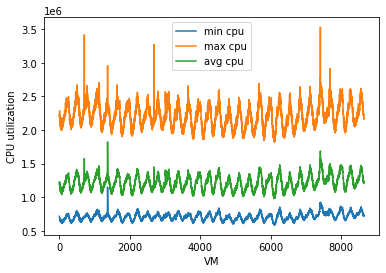

In [ ]:

df.plot()
plt.xlabel('VM')
plt.ylabel('CPU utilization')
plt.show()

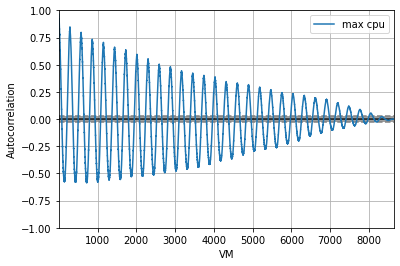

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['max cpu'],label='max cpu')
plt.xlabel('VM')
plt.show()

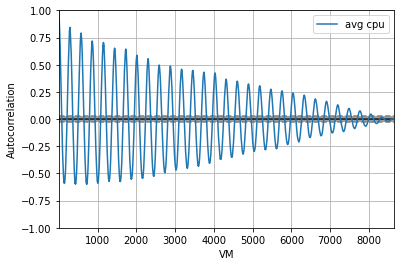

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['avg cpu'],label='avg cpu')
plt.xlabel('VM')
plt.show()

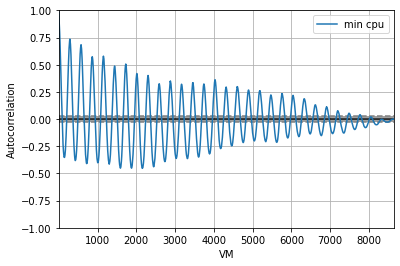

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['min cpu'],label='min cpu')
plt.xlabel('VM')
plt.show()